In [156]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [157]:
# 1 - Carregar os dados
arquivo = 'atividade2 - flights_100.csv'
df = pd.read_csv(arquivo)

In [158]:
# 2 - Exibir informações-chave

# Dimensão
df.shape

(100, 9)

In [159]:
# Amostra
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710


In [160]:
# Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FL_DATE            100 non-null    object 
 1   OP_UNIQUE_CARRIER  100 non-null    object 
 2   TAIL_NUM           100 non-null    object 
 3   ORIGIN             100 non-null    object 
 4   DEST               100 non-null    object 
 5   CRS_DEP_TIME       100 non-null    int64  
 6   DEP_DELAY          90 non-null     float64
 7   ARR_DELAY          90 non-null     float64
 8   DISTANCE           100 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB


In [161]:
# Conversão de datas para datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [162]:
# 3 - Classificar colunas em numéricas x categóricas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [163]:
print(colunas_numericas)

['CRS_DEP_TIME', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE']


In [164]:
print(colunas_categoricas)

['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST']


In [165]:
# Correção de categorias incosistentes
df[colunas_categoricas] = df[colunas_categoricas].apply(lambda x: x.str.strip().str.upper())

In [166]:
# Valores ausentes
df.isnull().sum()

FL_DATE               0
OP_UNIQUE_CARRIER     0
TAIL_NUM              0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_DELAY            10
ARR_DELAY            10
DISTANCE              0
dtype: int64

In [167]:
# Porcentagem de nulos por coluna

porcentagem_nulos = (df.isnull().mean() * 100).round(2)
print(porcentagem_nulos)

FL_DATE               0.0
OP_UNIQUE_CARRIER     0.0
TAIL_NUM              0.0
ORIGIN                0.0
DEST                  0.0
CRS_DEP_TIME          0.0
DEP_DELAY            10.0
ARR_DELAY            10.0
DISTANCE              0.0
dtype: float64


In [168]:
# 4 - Gerar estatísticas descritivas
df.describe()

,FL_DATE,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
count,100,100.00000,90.000000,90.000000,100.000000
mean,2023-02-19 12:00:00,1242.93000,9.066667,7.688889,2897.620000
min,2023-01-01 00:00:00,16.00000,-57.000000,-103.000000,337.000000
25%,2023-01-25 18:00:00,626.00000,-15.000000,-20.500000,1859.250000
50%,2023-02-19 12:00:00,1230.50000,7.000000,6.000000,2940.000000
75%,2023-03-16 06:00:00,1812.25000,33.250000,36.250000,4266.000000
max,2023-04-10 00:00:00,2331.00000,106.000000,90.000000,4984.000000
std,NaN,686.19325,33.684525,39.095574,1420.354052


#### Tratamento de nulos com SimpleImputer:

SimpleImputer foi escolhido por motivos de interesse no aprendizado do método, afinal é utilizado em soluções voltadas ao Machine Learning.

In [169]:
# Utiliza a mediana para imputar nas colunas numéricas
imputer_numericos = SimpleImputer(strategy='median')

# O fit_transform aprende a mediana e substitui os valores nulos
df[colunas_numericas] = imputer_numericos.fit_transform(df[colunas_numericas])

In [170]:
# Utiliza o mais frequente para imputar nas colunas categóricas
imputer_categoricos = SimpleImputer(strategy='most_frequent')

# O fit_transform aprende o mais frequente e substitui os valores nulos
df[colunas_categoricas] = imputer_categoricos.fit_transform(df[colunas_categoricas])

In [171]:
# Verificação dos nulos
df.isnull().sum()

FL_DATE              0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
ORIGIN               0
DEST                 0
CRS_DEP_TIME         0
DEP_DELAY            0
ARR_DELAY            0
DISTANCE             0
dtype: int64

In [172]:
# 5 - Inspecionar a variável-alvo (atraso)

alvo_dep = df['DEP_DELAY']
alvo_arr = df['ARR_DELAY']

atraso_15_dep = alvo_dep[alvo_dep > 15]
atraso_15_arr = alvo_arr[alvo_arr > 15]
proporcao_dep = (len(atraso_15_dep) / len(alvo_dep))
proporcao_arr = (len(atraso_15_arr) / len(alvo_arr))

print('Análise das Colunas DEP_DELAY e ARR_DELAY')
print(f'Quantidade de voos com atraso > 15 min na decolagem: {len(atraso_15_dep)}')
print(f'Proporção de voos com atraso > 15 min na decolagem: {proporcao_dep:.2f}%')
print(f'Quantidade de voos com atraso > 15 min no pouso: {len(atraso_15_arr)}')
print(f'Proporção de voos com atraso > 15 min no pouso: {proporcao_arr:.2f}%')

Análise das Colunas DEP_DELAY e ARR_DELAY
Quantidade de voos com atraso > 15 min na decolagem: 38
Proporção de voos com atraso > 15 min na decolagem: 0.38%
Quantidade de voos com atraso > 15 min no pouso: 38
Proporção de voos com atraso > 15 min no pouso: 0.38%


In [173]:
# Criação de uma coluna binário "Atraso > 15 min"

# 1 = Atendeu a condição (atraso) | 0 = Não atendeu a condição
df['atraso_maior_15min'] = np.where((df['DEP_DELAY'] > 15) | (df['ARR_DELAY'] > 15), 1, 0)
print(df['atraso_maior_15min'].value_counts())

atraso_maior_15min
1    64
0    36
Name: count, dtype: int64


In [174]:
# Extração do mês, dia da semana e hora do horário de partida

df['Mes'] = df['FL_DATE'].dt.month
df['Dia_Semana'] = df['FL_DATE'].dt.dayofweek
df['Hora'] = df['FL_DATE'].dt.hour

# Calcular Atraso Absoluto
df['Atraso_Absoluto_ARR'] = df['ARR_DELAY'].abs()
df['Atraso_Absoluto_DEP'] = df['DEP_DELAY'].abs()

df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE,atraso_maior_15min,Mes,Dia_Semana,Hora,Atraso_Absoluto_ARR,Atraso_Absoluto_DEP
0,2023-01-01,AZUL,N1000,GIG,FOR,1369.0,7.0,32.0,4984.0,1,1,6,0,32.0,7.0
1,2023-01-02,SW,N1001,BSB,MIA,1986.0,-42.0,-38.0,4200.0,0,1,0,0,38.0,42.0
2,2023-01-03,LATAM,N1002,ORD,REC,1534.0,-30.0,21.0,1833.0,1,1,1,0,21.0,30.0
3,2023-01-04,AZUL,N1003,JFK,FOR,146.0,-39.0,52.0,2352.0,1,1,2,0,52.0,39.0
4,2023-01-05,UA,N1004,GIG,SFO,1734.0,-24.0,42.0,710.0,1,1,3,0,42.0,24.0


In [175]:
# Identificação de outliers

Q1_DEP = df['DEP_DELAY'].quantile(0.25)
Q3_DEP = df['DEP_DELAY'].quantile(0.75)
IQR_DEP = Q3_DEP - Q1_DEP

Q1_ARR = df['ARR_DELAY'].quantile(0.25)
Q3_ARR = df['ARR_DELAY'].quantile(0.75)
IQR_ARR = Q3_ARR - Q1_ARR

limite_inferior_dep = Q1_DEP - 1.5 * IQR_DEP
limite_superior = Q3_DEP + 1.5 * IQR_DEP

limite_inferior_arr = Q1_ARR - 1.5 * IQR_ARR
limite_superior = Q3_ARR + 1.5 * IQR_ARR

outliers_dep = df[(df['DEP_DELAY'] < limite_inferior_dep) | (df['DEP_DELAY'] > limite_superior)]
outliers_arr = df[(df['ARR_DELAY'] < limite_inferior_arr) | (df['ARR_DELAY'] > limite_superior)]

In [176]:
print(f'Total de outliers na coluna DEP_DELAY encontrados: {len(outliers_dep)}')
print(outliers_dep)

Total de outliers na coluna DEP_DELAY encontrados: 1
      FL_DATE OP_UNIQUE_CARRIER TAIL_NUM ORIGIN DEST  CRS_DEP_TIME  DEP_DELAY  \
62 2023-03-04                DL    N1062    LAX  FOR         459.0      106.0   

    ARR_DELAY  DISTANCE  atraso_maior_15min  Mes  Dia_Semana  Hora  \
62       63.0     337.0                   1    3           5     0   

    Atraso_Absoluto_ARR  Atraso_Absoluto_DEP  
62                 63.0                106.0  


In [177]:
print(f'\nTotal de outliers na coluna ARR_DELAY encontrados: {len(outliers_arr)}')
print(outliers_arr)


Total de outliers na coluna ARR_DELAY encontrados: 1
      FL_DATE OP_UNIQUE_CARRIER TAIL_NUM ORIGIN DEST  CRS_DEP_TIME  DEP_DELAY  \
19 2023-01-20                SW    N1019    GRU  MIA        1016.0        6.0   

    ARR_DELAY  DISTANCE  atraso_maior_15min  Mes  Dia_Semana  Hora  \
19     -103.0     916.0                   0    1           4     0   

    Atraso_Absoluto_ARR  Atraso_Absoluto_DEP  
19                103.0                  6.0  


In [178]:
# Filtrando voos de uma companhia específica

# GOL:
voos_gol = df.query("OP_UNIQUE_CARRIER == 'GOL'")
# LATAM:
voos_latam = df.query("OP_UNIQUE_CARRIER == 'LATAM'")

print(f'Quantidade de voos da GOL: {len(voos_gol)}')
print(f'Quantidade de voos da LATAM: {len(voos_latam)}')

Quantidade de voos da GOL: 15
Quantidade de voos da LATAM: 12


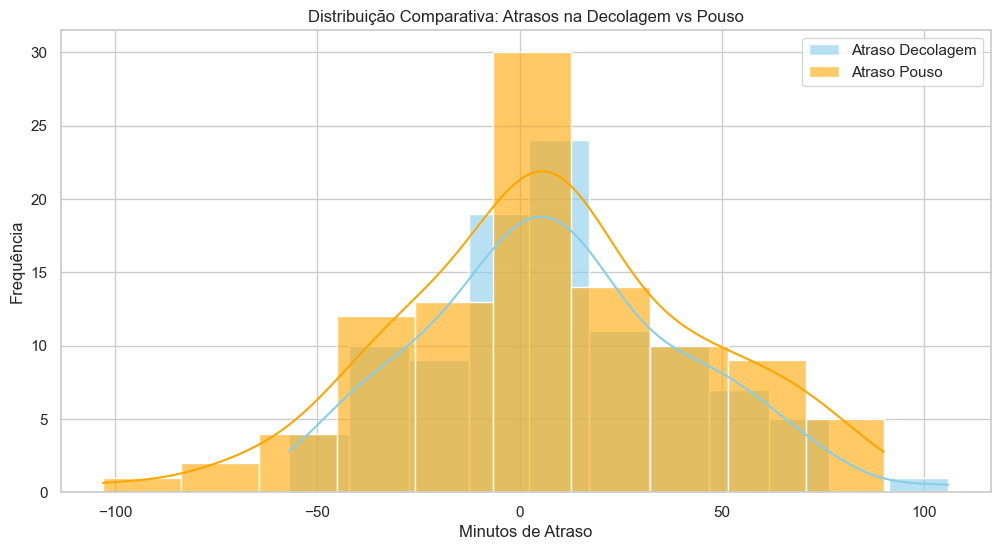

In [179]:
# 6 - Produzir no mínimo 2 visualizações

# Histograma/KDE de atrasos:

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))

# Histograma da decolagem
sns.histplot(data=df, x='DEP_DELAY', color='skyblue', label='Atraso Decolagem', kde=True, alpha=0.6)

# Histograma do pouso
sns.histplot(data=df, x='ARR_DELAY', color='orange', label='Atraso Pouso', kde=True, alpha=0.6)

plt.title('Distribuição Comparativa: Atrasos na Decolagem vs Pouso')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Frequência')
plt.legend()
plt.show()

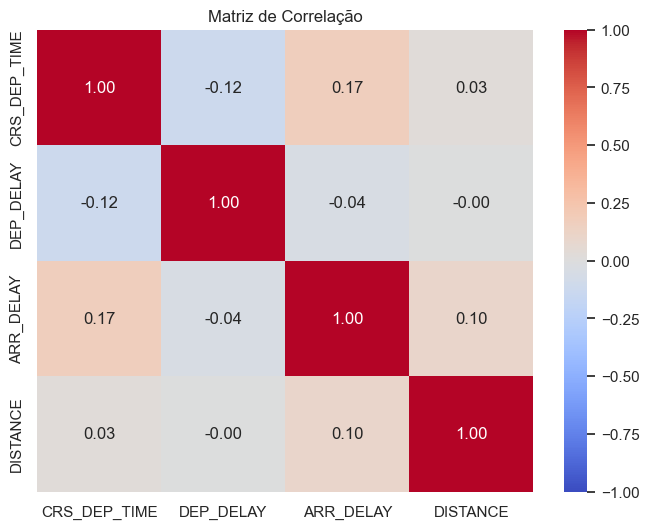

In [180]:
# Heatmap de Correlações

plt.figure(figsize=(8, 6))
matriz_corr = df[colunas_numericas].corr()

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [181]:
# 7 - Registrar insights em células Markdown

### Insights
- O dataset fornecido possuía valores 10 valores nulos em cada coluna referente a atrasos (DEP_DELAY, ARR_DELAY), os quais poderiam interferir na exploração de dados, então foram imputadas as medianas nestes espaços vazios.
- Um outlier extremo na coluna ARR_DELAY com valor de -103 minutos indica possível dado inserido de forma errônea pois representa 1h40 de adiantamento da chegada do avião. Mesmo sendo possível, cabe revisão
- Este datasete possui uma alta taxa de atrasos, mais especificamente 64% das amostras fornecidas, por se tratar de um dataset pequeno pode ser algo normal pelo tamanho do recorte, mas cabe revisão.
### Colunas e Correlações
- O heatmap exibido evidenciou uma correlação forte entre DEP_DELAY e ARR_DELAY, o que indica um óbvio efeito cascata: se o avião se atrasa, raramente recupera todo o tempo em voo.
- A coluna TAIL_NUM possui muitos valores únicos. Para um modelo preditivo com apenas 100 linhas, ela atua mais como um identificador do que como um padrão feneralizável, podendo ser descartada em modelagens futuras.
### Hipóteses para Tratamento Futuro
- Revisão da Imputação de Nulos: Utilizamos a mediana para preencher atrasos nulos (SimpleImputer).
    - Hipótese: Um valor nulo em atraso pode significar que o voo foi cancelado ou que saiu exatamente no horário (0). Preencher com a mediana (ex: 7 minutos) pode estar inserindo um viés de atraso onde não existe. Testar preenchimento com 0 ou criar uma flag is_cancelled seria o próximo passo.
- Sazonalidade: As colunas extraídas (Hora, Dia_Semana) precisam ser analisadas em um volume maior de dados para confirmar se voos na sexta-feira ou em horários de pico (início da manhã/fim da tarde) têm estatisticamente mais atrasos.